# lazyfit model catalog for fitting 1d datasets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lazyfit

# Table of Contents

Spectral lineshapes and distributions
- [Lorentzian](#Lorentzian)
- [Gaussian](#Gaussian)
- [Normalised Gaussian](#Normalised-Gaussian)
- [Voigt](#Voigt)

Decays
- [Exponential decay](#Exponential-decay)
- [Stretched exponential](#Stretched-exponential)
- [Biexponential decay](#Biexponential-decay)
- [Convolved exponential decay](#convolved-exponential)

Oscillations
- [Sine](#sine)
- [Dampened sine](#Dampened-sine)
- [Ramsey](#Ramsey)

Two-level systems
- [Rabi oscillations](#Rabi-oscillations)
- [Two-level saturation](#two-level-saturation)

Polynomials
- [Linear](#linear)
- [Quadratic](#quadratic)

Logistic functions
- [Logistic rise](#logistic-rise)
- [Logistic pulse](#logistic-pulse)

Double peaks
- [Dual Gaussian](#Dual-Gaussian)
- [Dual Lorentzian](#Dual-Lorentzian)

Spin
- [T1 measurement](#T1-measurement)

Gaussian optics
- [Beam width](#Beam-width)

# Lorentzian

Unnormalised Lorentzian distribution plus constant background.

This distribution commonly occurs in spectroscopy

$f(x) = \frac{A}{1+(x-x0)^2/(FWHM/2)^2} + B$

In [2]:
# data parameters
A = 500 # amplitude
x0 = 1 # peak location
B = 100 # background 
FWHM = 2 # full width half maximum

# generat data
x = np.linspace(-10, 10, 50)
y = lazyfit.models.lorentz.f(x, A, x0, FWHM, B)
y_noise = np.random.poisson(lam=y)

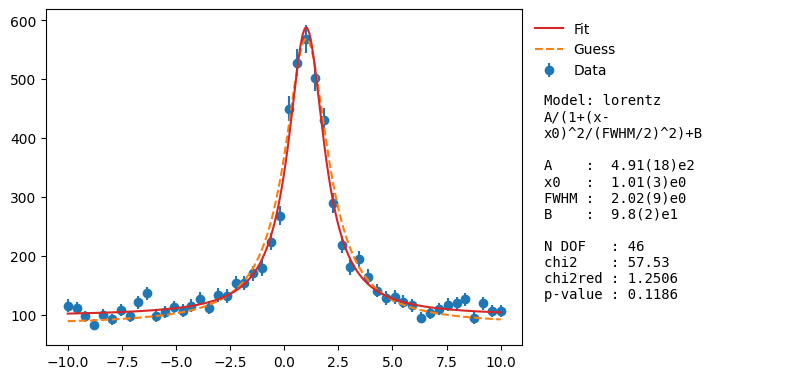

In [3]:
# fit
fit_lorentz = lazyfit.fit('lorentz', x, y_noise, dy=np.sqrt(y_noise))
fit_lorentz.plot(N=200, plot_guess = True);

In [4]:
fit_lorentz.get_fwhm() # get FWHM and error on FWHM

(2.0160074255250304, 0.09367412699579115)

# Gaussian

Unnormalised Gaussian (normal distribution) plus constant background.

In this version, $A$ is the amplitude at resonance, ie. the centre of the Gaussian

$f(x) = A\cdot e^{-(x-x_0)^2/(2s^2)} + B$

In [5]:
# data parameters
A = 500 # amplitude
x0 = 1 # peak location
s = 1 # standard deviation
B = 100 # background

# generate data
x = np.linspace(-10, 10, 50)
y = lazyfit.models.gaussian.f(x, A, x0, s, B)
y_noise = np.random.poisson(lam=y)

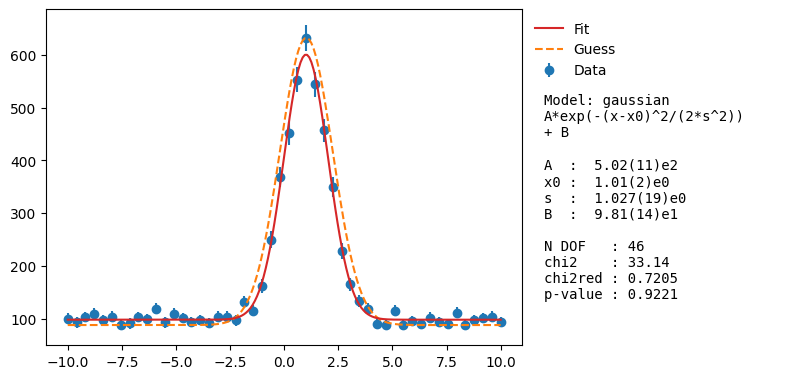

In [6]:
fit_gauss = lazyfit.fit('gaussian', x, y_noise, dy=np.sqrt(y_noise))
fit_gauss.plot(N=200, plot_guess = True);

In [7]:
fit_gauss.get_fwhm() # get FWHM and error on FWHM

(2.4182830205769554, 0.04517807199372382)

# Normalised Gaussian

Normalised Gaussian (normal distribution)

In this version, $A$ is the area beneath the Gaussian

$f(x) = \frac{A}{2\pi s^2}\cdot e^{-(x-x_0)^2/(2s^2)}$

In [8]:
# data parameters
area = 1000 # area
x0 = 1 # peak location
s = 1 # standard deviation

# generate data
x = np.linspace(-10, 10, 50)
y = lazyfit.models.normgaussian.f(x, area, x0, s)
y_noise = y+np.random.normal(size=y.shape)*20

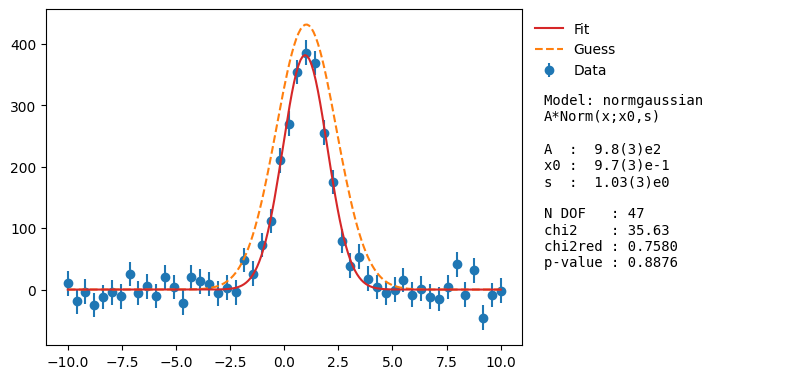

In [9]:
fit_normgauss = lazyfit.fit('normgaussian', x, y_noise, dy=20)
fit_normgauss.plot(N=200, plot_guess = True);

In [10]:
fit_normgauss.get_fwhm() # get FWHM and error on FWHM

(2.4190324727071153, 0.07382656938952904)

# Voigt

Voigt profile plus constant background

A Voigt profile is the convolution of a Lorentzian and Gaussian. This commonly occurs in spectroscopy when a Lorentzian spectrum is broadened by Gaussian noise or a Gaussian instrument response

$f(x) \propto \int_{-\infty}^{\infty}dx^\prime e^{-(x^\prime)^2/(2s^2)} \frac{1}{1+(x-x_0-x^\prime)^2/(FWHM/2)^2} $

Note that in the fit function, $A$ is the amplitude at resonance, not the area.
Additionally, to treat we Gaussian and Lorentzian distributions equally, we parametrise them via their FWHM values $G$ and $L$, respectively.

In [11]:
# data parameters
A = 1000 # peak amplitude
x0 = 0 # peak location
L = 1 # lorentzian FWHM
G = 2 # Gaussian FWHM
B = 100 # background

# generate data
x = np.linspace(-5 ,5 , 100)
y = lazyfit.models.voigt.f(x, A, x0, L, G, B )
y_noise = np.random.poisson(lam=y)

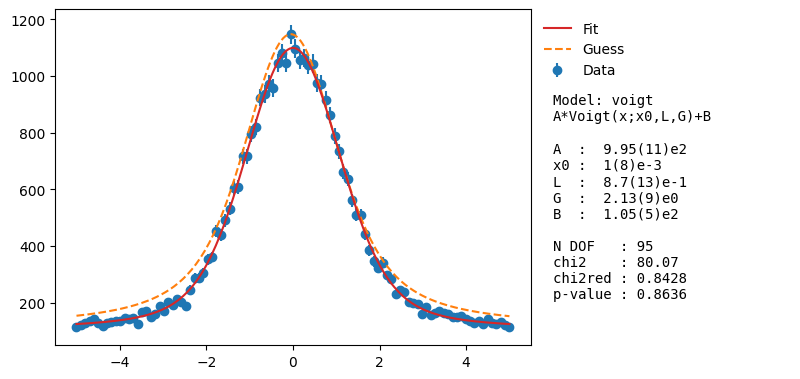

In [12]:
fit_voigt = lazyfit.fit('voigt', x, y_noise, dy=np.sqrt(y_noise))
fit_voigt.plot(N=200, plot_guess = True);

Calculate the total FWHM:

In [13]:
fit_voigt.get_fwhm() # get FWHM and error on FWHM.

(2.6304182879891944, 0.0797707008094358)

This uses error propagation to combine the errors on the Lorentzian and Gaussian components. The covariance of these two components is included as there is a strong correlation between the estimated fit parameters.

# Exponential decay

Exponential decay plus constant background

$f(x)=A\times e^{-x\cdot k} + B$


In [14]:
# test data parameters
A = 2000 # amplitude at x=0
k = 1 # decay rate, the inverse of the 1/e time
B = 10 # background

# generate test data
x = np.linspace(0, 10, 50)
y = lazyfit.models.exp.f(x, A, k, B)
y_noise = np.random.poisson(lam=y)

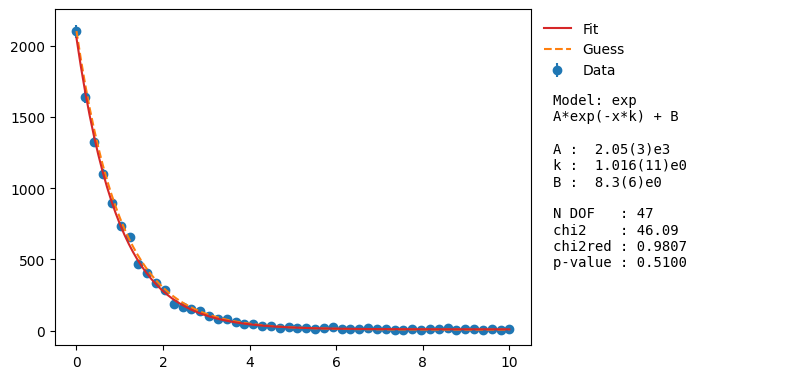

In [15]:
fit_exp = lazyfit.fit('exp', x, y_noise, dy = np.sqrt(y_noise))
fig = fit_exp.plot(plot_guess = True)

Here it can be usefull to enable the logarithmic y axis and to plot the residuals

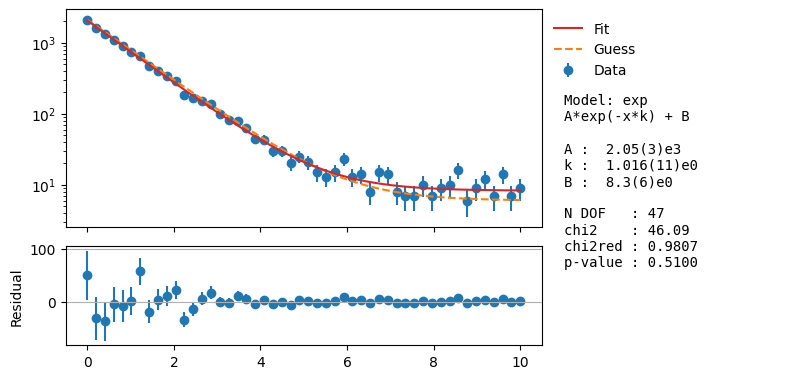

In [16]:
fig = fit_exp.plot(plot_guess = True, logy = True, plot_residuals=True)

# Stretched exponential
Exponential decay, but with a free exponent and no background.
This function is very common in coherence measurements.

$y(x)=A\times \exp(-(x/T)^{alpha})$

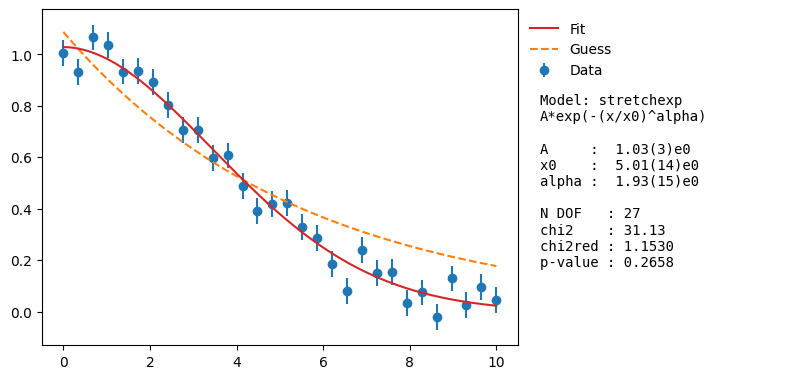

In [17]:
# test data parameters
A = 1 # amplitude
x0 = 5 # 1/e time of envelope
alpha = 2 # exponential exponent of envelope

# generate test data
x = np.linspace(0, 10, 30)
y = lazyfit.models.stretchexp.f(x, A, x0, alpha)
y_noise = y + np.random.normal(scale=0.05, size=x.size)
fit_stretchexp = lazyfit.fit('stretchexp', x, y_noise, dy=0.05)
fig = fit_stretchexp.plot(plot_guess=True)

For compatibility reasons, this fit model also exists with the fitname "ramseyenvelope".

Here, the time constant is called "T2s" 

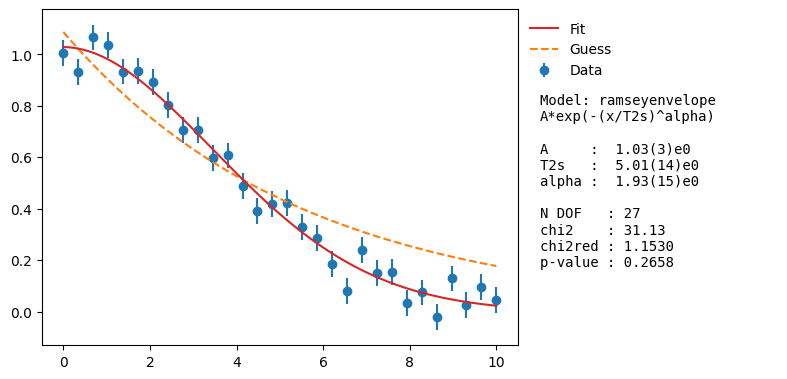

In [18]:
fit_ramseyenvelope = lazyfit.fit('ramseyenvelope', x, y_noise, dy=0.05)
fig = fit_ramseyenvelope.plot(plot_guess=True)

# Biexponential decay

Sum of two independent exponential decays plus constant background

Commonly occurs in lifetimes measurements involving two decay channels

$f(x)=A1\times e^{-x\cdot k1} + A2\times e^{-x\cdot k2} + B$

In [21]:
# test data parameters
A1 = 2000 # amplitude at t=0, first exponential
k1 = 1 # decay rate, first exponential
A2 = 1000 # amplitude at t=0, second exponential
k2 = 0.1 # decay rate, second exponential
B = 0 # background

# generate test data
x = np.linspace(0,10,50)
y = lazyfit.models.biexp.f(x, A1, k1, A2, k2, B)
y_noise = np.random.poisson(lam=y)

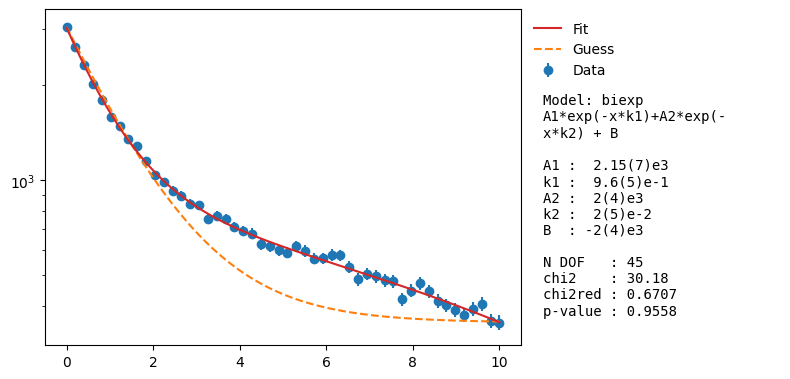

In [22]:
fit_biexp = lazyfit.fit('biexp', x, y_noise, dy = np.sqrt(y_noise))
fig = fit_biexp.plot(plot_guess = True, logy=True)

# Convolved exponential

Single exponential decay convolved with Gaussian response

Commonly occurs in lifetime measurements with the measured lifetime is comparable with the measurement timing resolution

The fit function is given by
$f(x) = \int_{-\infty}^{\infty}d\tau\frac{e^{-\tau^2/(2 s^2)}}{\sqrt{2\pi s^2}} G(x-\tau) + B$

where 
$G(x) = A\cdot e^{-x\cdot k} \text{ for } x\geq x_0, \text{otherwise } 0$ 

$A$ is the amplitude at $x=0$ in the absence of the convolution.

$x0$ is the start of the decay, eg. when your emitter starts to decay

$s$ is the standard deviation of the instrument response

In [23]:
# test data parameters
A = 2000 # amplitude at t=0
k = 1 # decay rate
B = 10 # background
x0 = 0 # start time of decay
s = 0.2 # instrument response standard deviation

# generate test data
x = np.linspace(-2,6,50)
y = lazyfit.models.convexp.f(x, A, k, B, x0, s)
y_noise = np.random.poisson(lam=y)

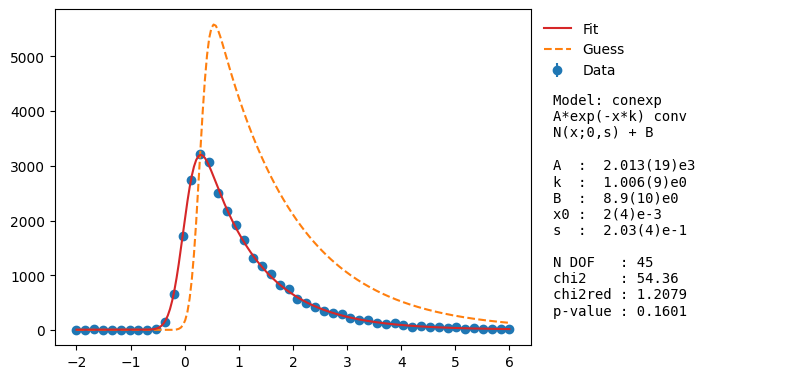

In [24]:
fit_convexp = lazyfit.fit('convexp', x, y_noise, dy = np.sqrt(y_noise))
fig = fit_convexp.plot(plot_guess = True)

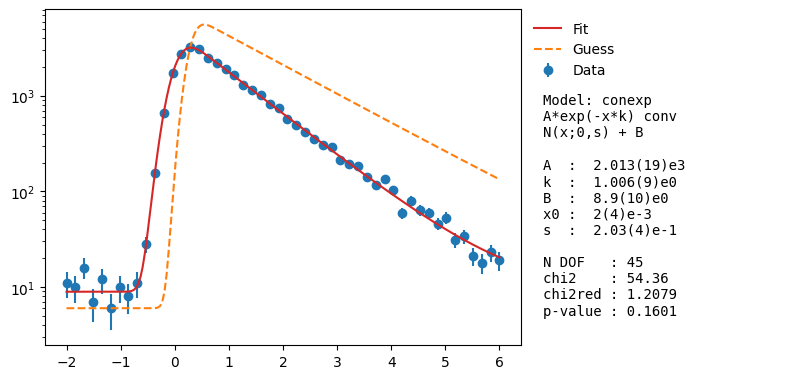

In [25]:
fig = fit_convexp.plot(plot_guess = True, logy = True)

# Sine

Sinussoid plus constant background

$f(x)=A\times \sin(f*2\pi*x+phi)+B$

In [26]:
# test data parameters
A = 0.5 # amplitude
f = np.random.uniform(2, 4) # positive, real frequency
phi = np.random.uniform(0, 2*np.pi) # phase, between 0 and 2pi
B = np.random.uniform(-3, 3) # constant offset

# generate test data
x = np.linspace(0,2,100)
y = lazyfit.models.sine.f(x, A, f, phi, B)
y_noise = y + np.random.normal(scale=0.1, size=x.size)

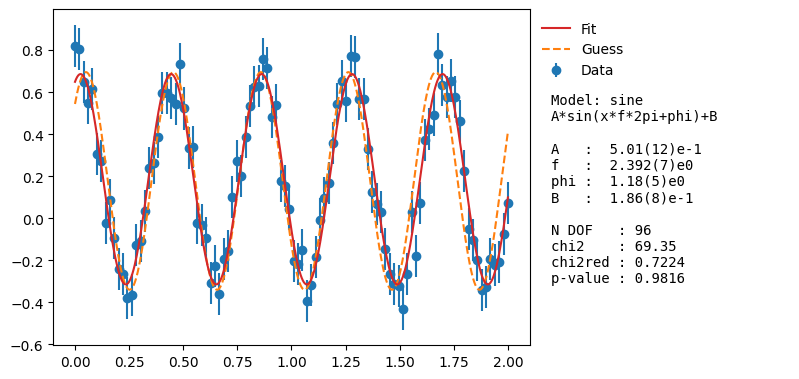

In [27]:
fit_sin = lazyfit.fit('sin',x,y_noise, dy=0.1)
fig = fit_sin.plot(N=400, plot_guess=True)

# Dampened sine

Sine with a stretched exponential decay envelope plus constant offset

$y(x)=A\times \sin(x*f*2\pi+phi)\times \exp(-(x/x0)^{alpha})+B$

In [28]:
# test data parameters
A = 5 # amplitude
f = 2.35 # positive, real frequency
phi = 0 # phase
B = 0 # constant offset
x0 = 5 # 1/e time of envelope
alpha = 2 # exponential exponent of envelope

# generate test data
x = np.linspace(0, 10, 200)
y = lazyfit.models.dampsine.f(x, A, f, phi, B, x0, alpha)
y_noise = y + np.random.normal(scale=0.2, size=x.size)

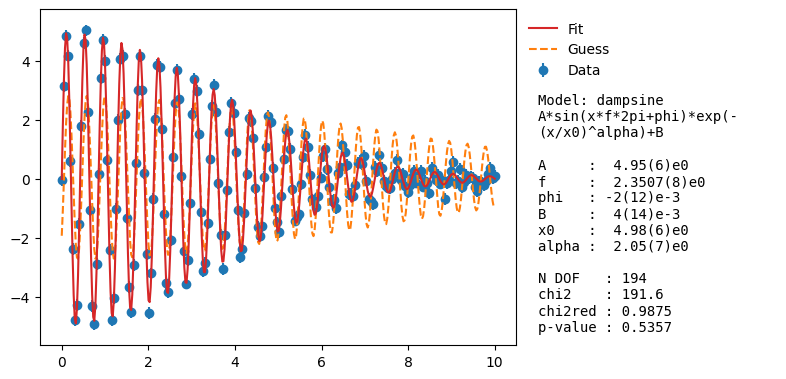

In [29]:
fit_dampsine = lazyfit.fit('dampsine', x, y_noise, dy=0.2)
fig = fit_dampsine.plot(N=400, plot_guess=True)

# Ramsey
This is the same fitmodel as "dampsine", but with a different naming convention

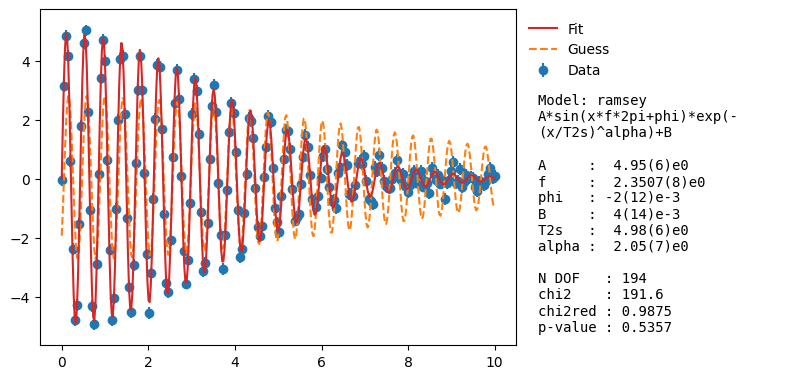

In [30]:
fit_ramsey = lazyfit.fit('ramsey', x, y_noise, dy=0.2)
fig = fit_ramsey.plot(N=400, plot_guess=True)

# Rabi oscillations

Rabi oscillations occurring in a two-level system

$f(x) = A\times \sin^2((x/xpi)*\pi/2) + B$

This is functionally the same as the sine fit, but using a different parametrisation

In [31]:
# test data parameters
A = 1000 # amplitude
B = 100 # background
x_pi = 0.5e-7 # pi pulse power

# generate test data
x = np.linspace(0, 2e-7, 30)
y = lazyfit.models.rabi.f(x, A, x_pi, B)
y_noise = np.random.poisson(lam=y)

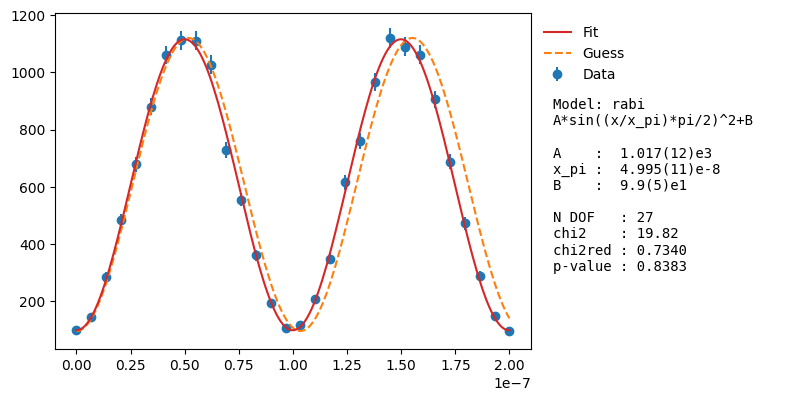

In [32]:
fit_rabi = lazyfit.fit('rabi', x, y_noise, dy=np.sqrt(y_noise))
fit_rabi.plot(N=200, plot_guess=True);

# Two-level saturation

Saturation of a two-level system

$f(x) = \frac{Imax}{1+Psat/x}$

In [33]:
# test data parameters
Psat = 0.2e-5 # saturation power
Imax = 1000 # intensity at infinite power

# generate test data
x = np.linspace(0, 5*Psat, 30)
y = lazyfit.models.twolvlsat.f(x, Psat, Imax)
y_noise = np.random.poisson(lam=y+10)

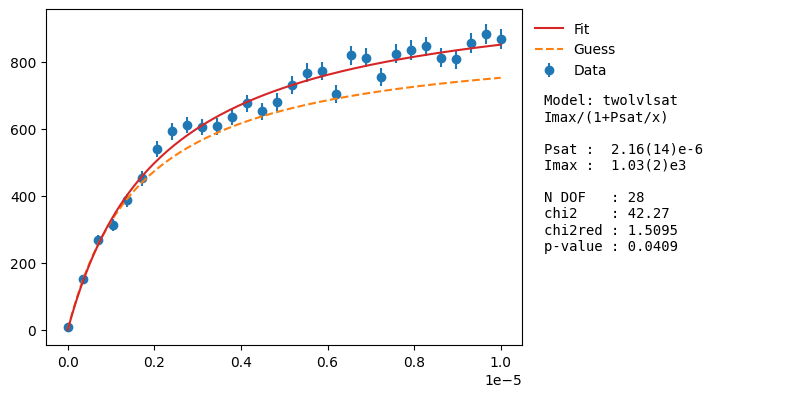

In [34]:
fit_twolvlsat = lazyfit.fit('twolvlsat', x, y_noise, dy=np.sqrt(y_noise))
fit_twolvlsat.plot(N=200, plot_guess=True);

# Linear

$f(x) = Ax+B$

In [35]:
# test data parameters
A = 5 # linear slope
B = 1 # y-intercept

# generate test data
x = np.linspace(-2,5,20)
y = lazyfit.models.lin.f(x, A, B)
y_noise = y + np.random.normal(scale = 1, size=y.size)

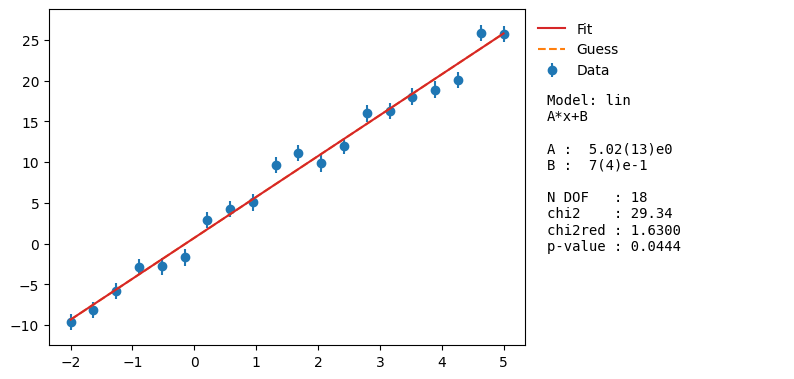

In [36]:
fit_lin = lazyfit.fit('lin', x, y_noise, dy=1)
fit_lin.plot(N=200, plot_guess = True);

# Quadratic

$f(x) = Ax^2+Bx+C$

In [37]:
# test data parameters
A = 5 
B = -3
C = 4

# generate test data
x = np.linspace(-3,5,20)
y = lazyfit.models.quadratic.f(x, A, B, C)
y_noise = y + np.random.normal(scale = 5, size=y.size)

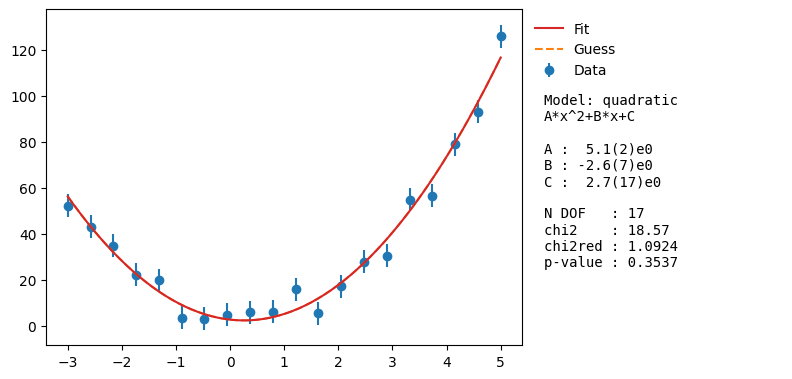

In [38]:
fit_quadratic = lazyfit.fit('quadratic', x, y_noise, dy=5)
fit_quadratic.plot(N=200, plot_guess = True);

# Logistic rise

In [50]:
# test data parameters
A = 1000 # amplitude
B = 100 # background
x0 = 0
k = 1

# generate test data
x = np.linspace(-10, 10, 30)
y = lazyfit.models.logistic.f(x, A, B, x0, k)
y_noise = np.random.poisson(lam=np.abs(y))

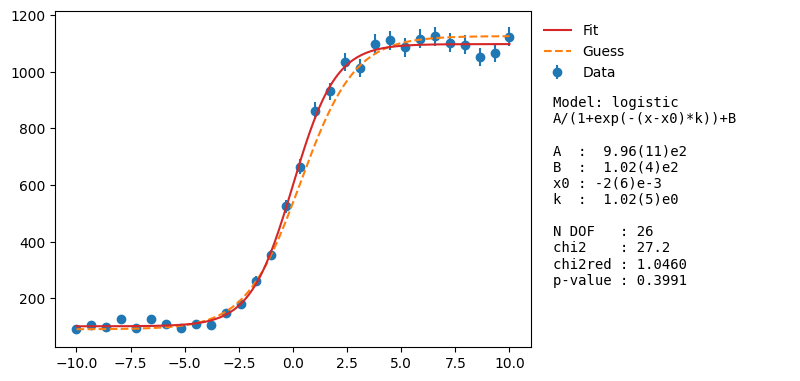

In [51]:
fit_logistic = lazyfit.fit('logistic', x, y_noise, dy=np.sqrt(y_noise))
fit_logistic.plot(N=200, plot_guess = True);

### Convert logistic rate to risetime

In [41]:
# get the estimate and uncertainty of the 10/90 risetime
fit_logistic.get_risetime()

(4.142889276326323, 0.22185280468354357)

In [42]:
# get risetime for custom rise limits, eg. 20% to 80 %
fit_logistic.get_risetime(low=0.2, high=0.8)

(2.613872110186401, 0.13997353538812482)

# Logistic pulse

The product of an increasing and decreasing logistic function.
This can be used to model square pulses with finite rise and fall times.

In [ ]:
# test data parameters
A = 1000 # amplitude
B = 100 # background
x0 = -2 # turn on time
x1 = 4 # turn off time
k0 = 2 # rising rate
k1 = 5 # falling rate

# generate test data
x = np.linspace(-10, 10, 30)
y = lazyfit.models.logpulse.f(x, A, B, x0, x1, k0, k1)
y_noise = np.random.poisson(lam=y)

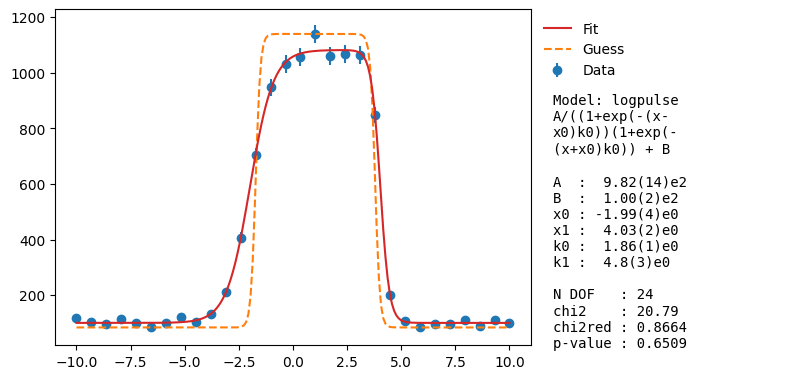

In [ ]:
fit_logpulse = lazyfit.fit('logpulse', x, y_noise, dy=np.sqrt(y_noise))
fit_logpulse.plot(N=200, plot_guess = True);

# Dual Gaussian

This model uses the sum of two independent Gaussians to fit two peaks. The automatic guess estimation works by finding the largest peak, subtracting this from the data, and looking for a second peak. This works reasonable well as long as the data is not too noisy and the peaks dont overlap to much

In [53]:
# parameters of first peak
A1 = 100 # amplitude 
x1 = -1 # location
s1 = 0.3 # standard deviation

# parameters of first peak
A2 = 50 # amplitude 
x2 = 1 # location
s2 = 0.5 # standard deviation

B = 20 # background

# generate data
x = np.linspace(-10, 10, 200)
y = lazyfit.models.dualgaussian.f(x,A1,x1,s1,A2,x2,s2,B)
y_noise = np.random.poisson(lam=y)

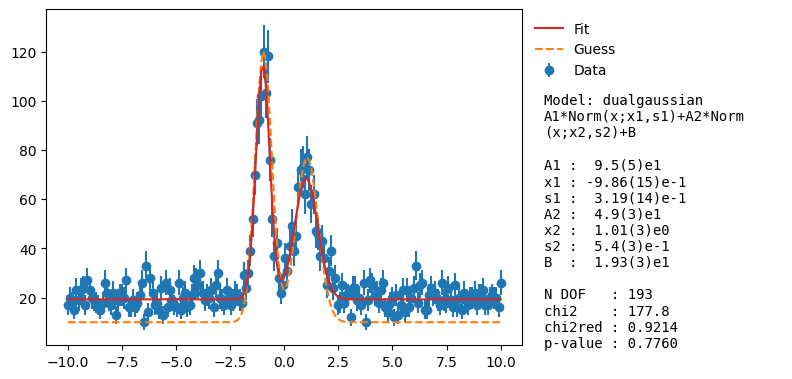

In [54]:
# fit
fit_dualgauss = lazyfit.fit('dualgaussian', x, y_noise, dy=np.sqrt(y_noise))
fit_dualgauss.plot(N=200, plot_guess = True);

# Dual Lorentzian

Same as above, but using two lorentzian functions

In [ ]:
# parameters of first peak
A1 = 100 # amplitude 
x1 = -1 # location
FWHM1 = 0.6 # standard deviation

# parameters of first peak
A2 = 50 # amplitude 
x2 = 1 # location
FWHM2 = 2 # standard deviation

B = 20 # background

# generate data
x = np.linspace(-10, 10, 200)
y = lazyfit.models.duallorentz.f(x,A1,x1,FWHM1,A2,x2,FWHM2,B)
y_noise = np.random.poisson(lam=y)

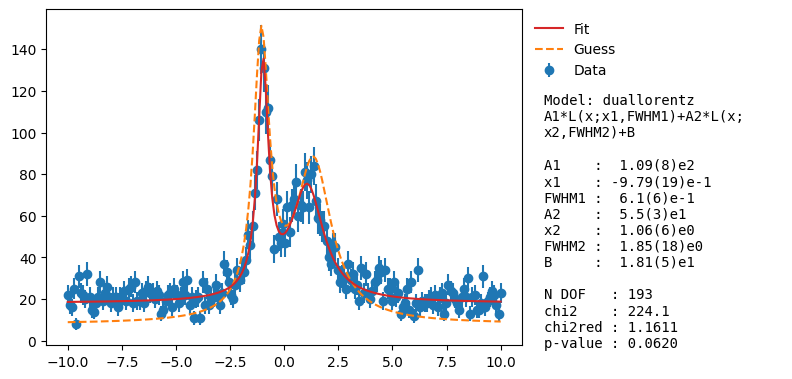

In [ ]:
# fit
fit_duallorentz = lazyfit.fit('duallorentz', x, y_noise, dy=np.sqrt(y_noise))
fit_duallorentz.plot(N=200, plot_guess = True);

# T1 measurement

In [ ]:
# test data parameters
T1 = 1 # T1 relaxation time
A = 500 # amplitude
B = 10 # data value at t=0

# generate test data
x = np.linspace(0, 5, 50)
y = lazyfit.models.T1.f(x, A, T1, B)
y_noise = np.random.poisson(lam=y)

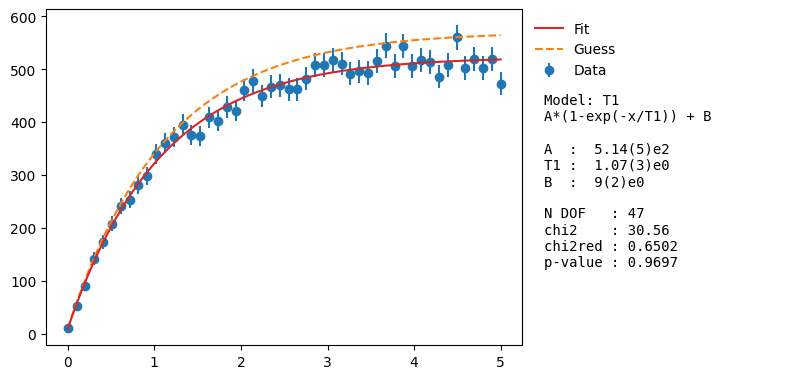

In [ ]:
# fit
fit_T1 = lazyfit.fit('T1', x, y_noise, dy=np.sqrt(y_noise))
fit_T1.plot(N=200, plot_guess = True);

# Beam width

Fit the position-dependent radius of a Gaussian laser beam as a function of distance from the beam waist, see e.g. https://experimentationlab.berkeley.edu/sites/default/files/MOT/Gaussian-Beam-Optics.pdf

The beamwaist is given by
$w(x) = w_0\left(1+\left(\frac{\lambda(x-x_0)}{\pi w_0^2}\right)^2\right)^{1/2}$

where x is the position, $w_0$ (w0) is the beam waist, $x_0$ (x0) is the location of the beam waist, and $\lambda$ (lam) is the wavelength.

As the wavelength is usually known, you must fix the wavelength (see example below)

In [ ]:
# test data parameters (all parameters in units of mm)
lam = 780e-6 # wavelength, 780 nm
x0 = -5 # peak position
w0 = 50e-3 # beam waist, 50 micrometers

# generate test data
x = np.linspace(-50, 50, 50)
y_error = 5e-3
y = lazyfit.models._func_beamwidth(x, x0, w0, lam) + np.random.normal(scale=y_error, size=x.size)

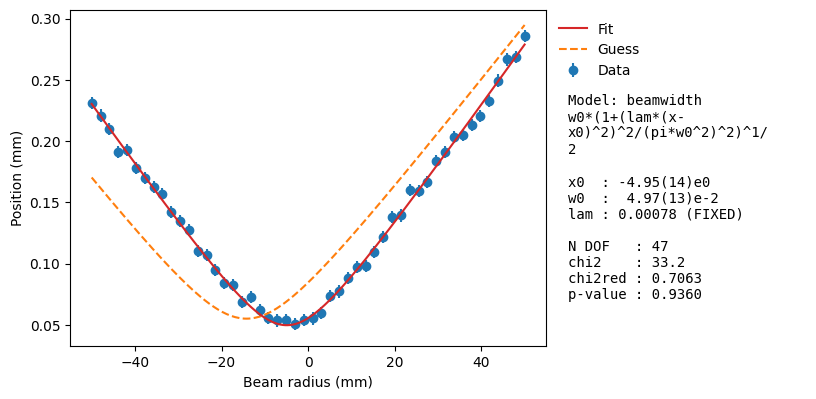

In [ ]:
fit_beamwidth = lazyfit.fit('beamwidth', x, y, dy=y_error, fix={'lam':lam})
fit_beamwidth.plot(plot_guess=True, xlabel='Beam radius (mm)', ylabel='Position (mm)');